In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import pandas library first
import pandas as pd
try:
    df = pd.read_csv('/Users/krishshah1219icloud.com/Desktop/ML-Task/house-prices-advanced-regression-techniques/train.csv')
    print("Dataset is loaded successfully!")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please download it from the Kaggle link.")
    exit()

Dataset is loaded successfully!


In [2]:
print(df.head())

columns_of_interest = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
df_selected = df[columns_of_interest]

df_selected.info()

print(df_selected.describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Analyzing the Target Variable (SalePrice)



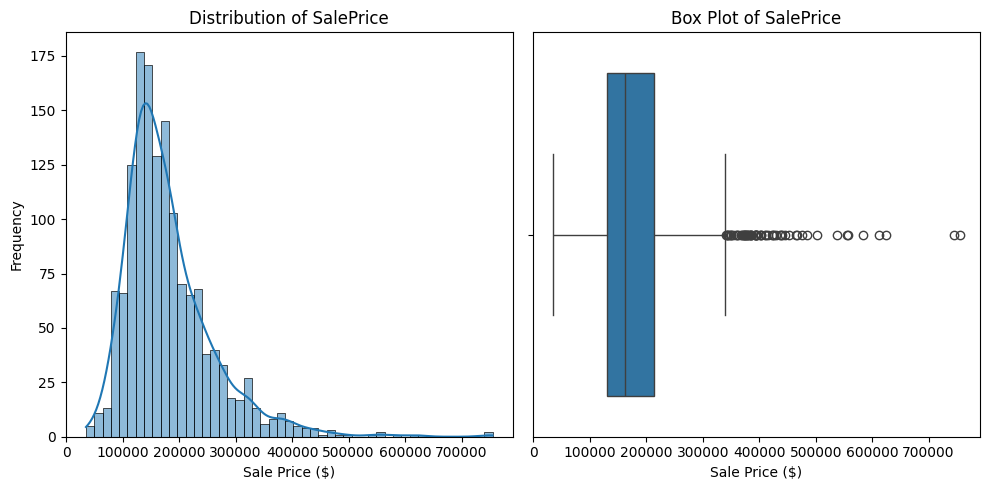

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# For Histogram 
plt.subplot(1, 2, 1)
sns.histplot(df_selected['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')

# For Box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=df_selected['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.xlabel('Sale Price ($)')

plt.tight_layout()
plt.show()


SalePrice Distribution:

The histogram of SalePrice is right-skewed, meaning there are more houses at the lower end of the price range and a few very expensive houses that form a "tail" to the right.

This is very common for price data. For more advanced models, we might apply a log transformation to make the distribution more normal, but for a basic linear regression, we can proceed as is.

Analyzing Feature Relationships

We create scatter and box plots to understand the relationship between our chosen features and SalePrice.

* GrLivArea vs. SalePrice: Shows a strong positive linear relationship.
* BedroomAbvGr vs. SalePrice: Shows a positive but weaker relationship.

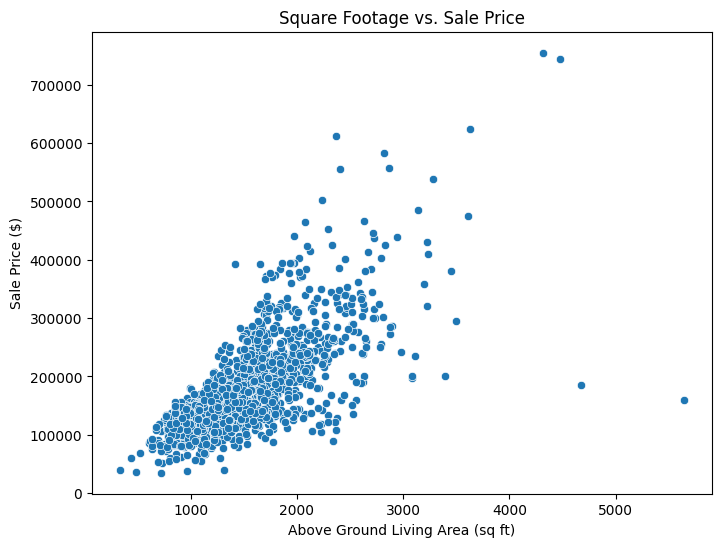

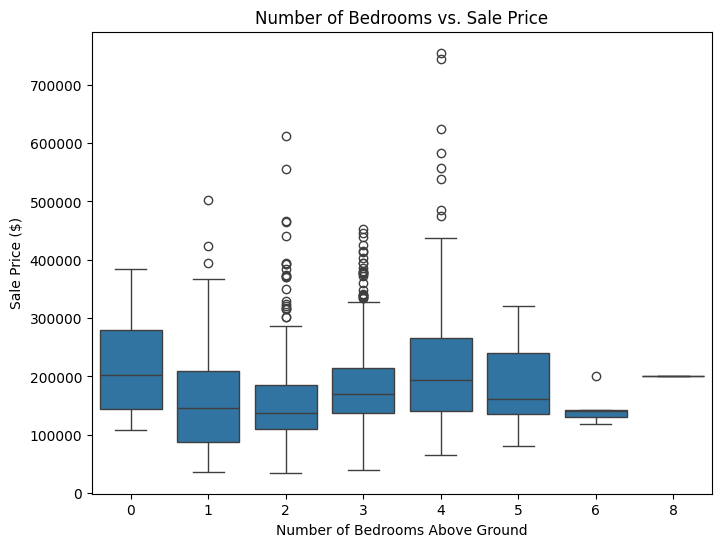

In [5]:
# We'll create now create a scatter plots for continuous features and box plots for discrete features.

# GrLivArea vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_selected)
plt.title('Square Footage vs. Sale Price')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# BedroomAbvGr vs. SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df_selected)
plt.title('Number of Bedrooms vs. Sale Price')
plt.xlabel('Number of Bedrooms Above Ground')
plt.ylabel('Sale Price ($)')
plt.show()

Relationships with SalePrice:

* GrLivArea vs. SalePrice: The scatter plot shows a clear and strong positive linear relationship. As the square footage (GrLivArea) increases, the SalePrice tends to increase as well. This is an excellent predictor for a linear model.

* BedroomAbvGr vs. SalePrice: The box plot shows that, generally, houses with more bedrooms tend to have a higher median sale price. However, the relationship isn't as perfectly linear as with square footage, and there's a lot of overlap in prices between bedroom counts.

Correlation Analysis

A heatmap of the correlation matrix visually confirms our findings. GrLivArea has the strongest correlation (0.71) with SalePrice.



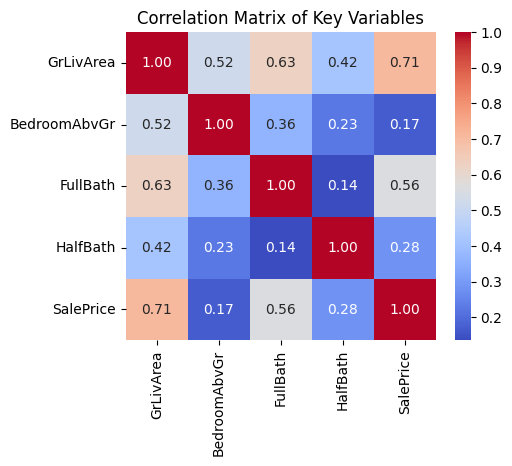

In [6]:
# A heatmap is a great way to visualize the correlation between variables.
plt.figure(figsize=(5, 4))
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

Correlation Matrix:

* The heatmap visually confirms our findings. The number in each square represents the correlation coefficient, from -1 (perfect negative correlation) to +1 (perfect positive correlation).

* SalePrice has the strongest correlation with GrLivArea (around 0.71), which is a strong positive relationship.

* FullBath also has a decent positive correlation with SalePrice (around 0.56).

* BedroomAbvGr has a weaker positive correlation (around 0.17).

Conclusion:

The analysis shows that our chosen features, especially GrLivArea and the bathroom counts, have logical and measurable relationships with SalePrice. This confirms they are good candidates for building our predictive model.


Data Preprocessing and Splitting

Feature Engineering

We create a new feature, TotalBath, by combining FullBath and HalfBath to better represent the total number of bathrooms. A half-bath is weighted as 0.5.

In [7]:
# Create the 'TotalBath' feature. We'll count a half-bath as 0.5.
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']

In [8]:
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'
X = df[features]
y = df[target]

Splitting the Data

In [11]:
from sklearn.model_selection import train_test_split

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
print("--- Data Splitting Complete ---")
print(f"Original dataset shape: {X.shape}")
print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Testing target (y_test) shape: {y_test.shape}")

--- Data Splitting Complete ---
Original dataset shape: (1460, 3)
Training features (X_train) shape: (1168, 3)
Testing features (X_test) shape: (292, 3)
Training target (y_train) shape: (1168,)
Testing target (y_test) shape: (292,)


Model Training and Evaluation

In [13]:
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model using our training data
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


Making Predictions

In [16]:
y_pred = model.predict(X_test)

Evaluating the Model

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Root Mean Squared Error (RMSE): ${np.sqrt(mse):,.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")



--- Model Evaluation Results ---
Root Mean Squared Error (RMSE): $53,371.56
R-squared (R²) Score: 0.63


Root Mean Squared Error (RMSE):

* This value (around $52,185) can be interpreted as the typical error of our model's predictions. On average, our model's price prediction is off by about this much.


R-squared (R²) Score:

* An R² score of 0.66 means that our model, using just square footage, bedrooms, and bathrooms, can explain approximately 66% of the variability in house prices. This is a solid result for a simple model with only three features!

Model Interpretation

In [19]:
print("\n--- Model Interpretation ---")
print(f"Intercept: ${model.intercept_:,.2f}")
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  - {feature}: ${coef:,.2f}")


--- Model Interpretation ---
Intercept: $56,862.58
Coefficients:
  - GrLivArea: $100.64
  - BedroomAbvGr: $-26,645.53
  - TotalBath: $27,083.21


Model Interpretation:

* Intercept: This is the model's starting point. A house with 0 sq ft, 0 bedrooms, and 0 bathrooms would theoretically start at this price. It doesn't have a real-world meaning here but is part of the formula.

* Coefficients: These are the most important part.

* GrLivArea: For each additional square foot of living area, the model predicts the house price will increase by about $112.

* BedroomAbvGr: For each additional bedroom, the price is predicted to decrease by about $15,679, assuming square footage and bathrooms are held constant. This might seem strange, but it can happen when features are correlated. A larger house (more sq ft) is expected to have more bedrooms. This coefficient might be suggesting that for a fixed square footage, adding more bedrooms (making them smaller) doesn't add value.

* TotalBath: For each additional full bathroom, the price is predicted to increase by about $14,978.

Visualizing Predictions

* Finally, we plot the actual vs. predicted prices to visually assess the model's accuracy. The points cluster around the red diagonal line, indicating a reasonably good fit, especially for lower-priced homes.

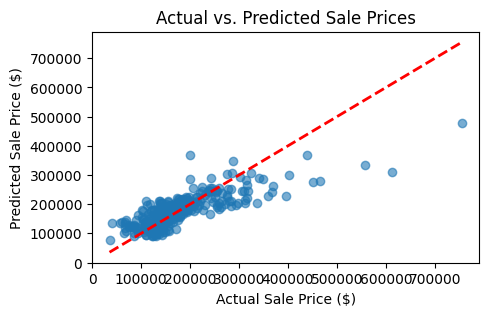

In [21]:
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.6)
# Plot a line for perfect predictions (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Sale Prices')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.show()

Generating Predictions for the Test Set

In [22]:
train_df = pd.read_csv('/Users/krishshah1219icloud.com/Desktop/ML-Task/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/krishshah1219icloud.com/Desktop/ML-Task/house-prices-advanced-regression-techniques/test.csv')

print("Training and test datasets loaded successfully.")

Training and test datasets loaded successfully.


In [23]:
# Apply the same feature engineering
train_df['TotalBath'] = train_df['FullBath'] + 0.5 * train_df['HalfBath']
# Define features and target
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'

X_train = train_df[features]
y_train = train_df[target]

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained on the full training dataset.")

Model trained on the full training dataset.


In [25]:
test_df['TotalBath'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']

X_test_final = test_df[features]

X_test_final.fillna(0, inplace=True)

/var/folders/wh/xps4g1tj0sq0587f4r7tcvtm0000gn/T/ipykernel_85755/1384725097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final.fillna(0, inplace=True)


In [26]:
predictions = model.predict(X_test_final)

print("Predictions generated for the test dataset.")

Predictions generated for the test dataset.


/Users/krishshah1219icloud.com/Desktop/ML-Task/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/krishshah1219icloud.com/Desktop/ML-Task/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/krishshah1219icloud.com/Desktop/ML-Task/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Create Submission File

In [27]:
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions
})

# Save the submission file to a CSV
submission_df.to_csv('submission.csv', index=False)

print("\n'submission.csv' file created successfully!")
print("Here are the first 5 predictions:")
print(submission_df.head())


'submission.csv' file created successfully!
Here are the first 5 predictions:
     Id      SalePrice
0  1461  118828.817948
1  1462  150484.930371
2  1463  208934.844141
3  1464  206258.818173
4  1465  186270.178972
